# Value Iteration

In [1]:
!pip install gym
!pip install numpy==1.23.5

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print('Load Packages')

Load Packages


# FrozenLake

In [3]:
env = gym.make('FrozenLake8x8-v1', render_mode="rgb_array")

obs_space = env.observation_space
n_state = obs_space.n
print('Observation space')
print("Total {} states".format(n_state))

act_space = env.action_space
n_act = act_space.n
print('Action space')
print("Total {} actions".format(n_act))

Observation space
Total 64 states
Action space
Total 4 actions


/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


### Value Iteration

Optimal value function will be found using Bellman optimality equation

$V^{*}(s) = \max_{a} \sum_{s'}[r(s,a,s')+\gamma V^{*}(s')]P(s'|s,a)$

Value iteration consists of three steps:

(1) Initial value is randomly initialized

(2) Update value function using Bellman optimality equation

(3) If infinite distance between updated value and current value is less than epsilon, then stop. Otherwise, repeat (2)


Value Iteration
Computation Time : 0.75



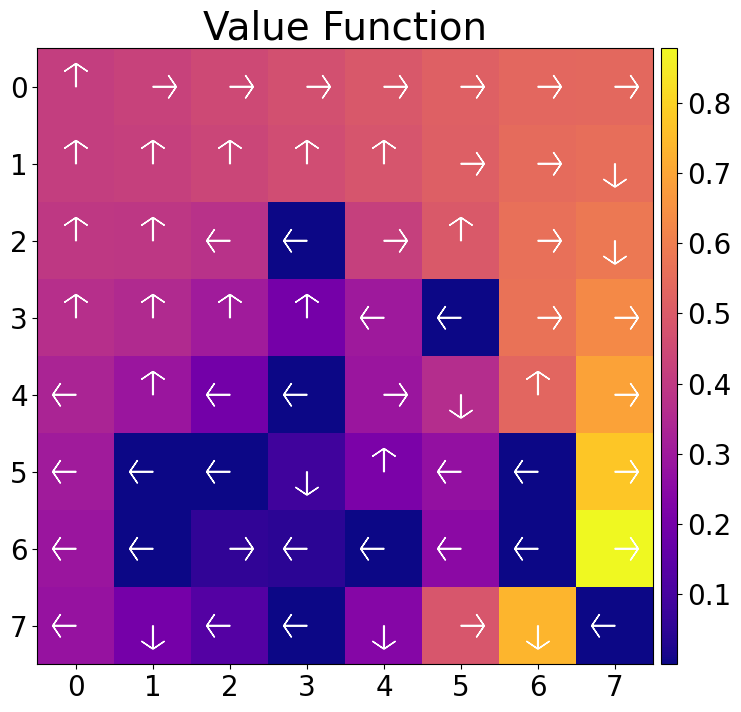

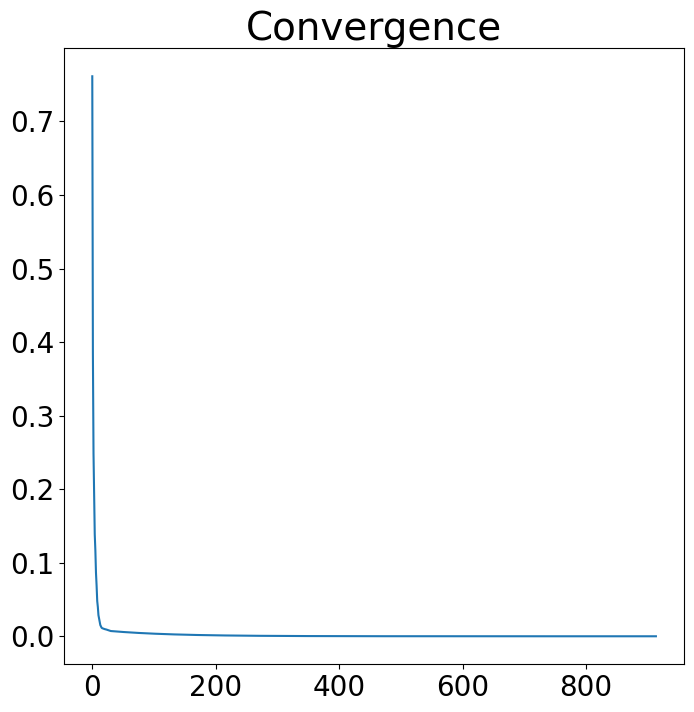

In [6]:
def value_iteration(env,gamma=0.99,epsilon=1e-6):
    # Extract World Information
    obs_space = env.observation_space
    n_state = obs_space.n
    act_space = env.action_space
    n_act = act_space.n

    # Transition Probability
    P = env.unwrapped.P

    # Random Initail
    value = np.random.uniform(size = (n_state,))
    error_list = []
    while True:
        # Initialize Q
        q = np.zeros((n_state,n_act),np.float64)

        # TODO
        # For all states s
        # For all actions a
        # For all possible transitions s'
        # Compute Q value for s,a
        for s in env.unwrapped.P.keys():
            for a in env.unwrapped.P[s].keys():
                for prob, next_s, reward, done in env.unwrapped.P[s][a]:
                    q[s][a] += prob * (reward + gamma*value[next_s])

        # TODO
        # Compute v prime as a maximum of Q value
        v_prime = np.max(q,axis=1)

        dist = np.max(np.abs(value-v_prime))
        error_list.append(dist)
        value = v_prime
        if dist < epsilon:
            break

    policy = np.zeros((n_state,n_act))
    policy[np.arange(n_state),np.argmax(q,axis=1)] = 1

    return policy, value, error_list

def plot_results(policy, value, fig_title="Value Function"):
    fig= plt.figure(figsize=(8,8))
    ax = plt.axes()
    ax.set_xticks(list(range(8)))
    ax.set_yticks(list(range(8)))
    im = plt.imshow(np.reshape(value,(8,8)),cmap='plasma')
    plt.title(fig_title,fontdict={'fontsize':28})
    arr_len = 0.2
    for i in range(8):
        for j in range(8):
            s = i*8+j
            if policy[s][0]> 0:
                plt.arrow(j,i,-arr_len,0,color="w",alpha=policy[s][0],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
            if policy[s][1]> 0:
                plt.arrow(j,i,0,arr_len,color="w",alpha=policy[s][1],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
            if policy[s][2]> 0:
                plt.arrow(j,i,arr_len,0,color="w",alpha=policy[s][2],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
            if policy[s][3]> 0:
                plt.arrow(j,i,0,-arr_len,color="w",alpha=policy[s][3],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
    cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
    cbar = plt.colorbar(im, cax=cax)
    cbar.ax.tick_params(labelsize=20)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    plt.show()

def plot_errors(_error_list):
    fig= plt.figure(figsize=(8,8))
    ax = plt.axes()

    plt.title("Convergence",fontdict={'fontsize':28})
    plt.plot(_error_list)

    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    plt.show()

if __name__=='__main__':
    print("Value Iteration")
    import time
    start = time.time()
    policy, value, error_list = value_iteration(env)
    print("Computation Time : %.2f"%(time.time() - start))
    print('')

    plot_results(policy, value)
    plot_errors(error_list)

### Effect of Discount Factor

/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

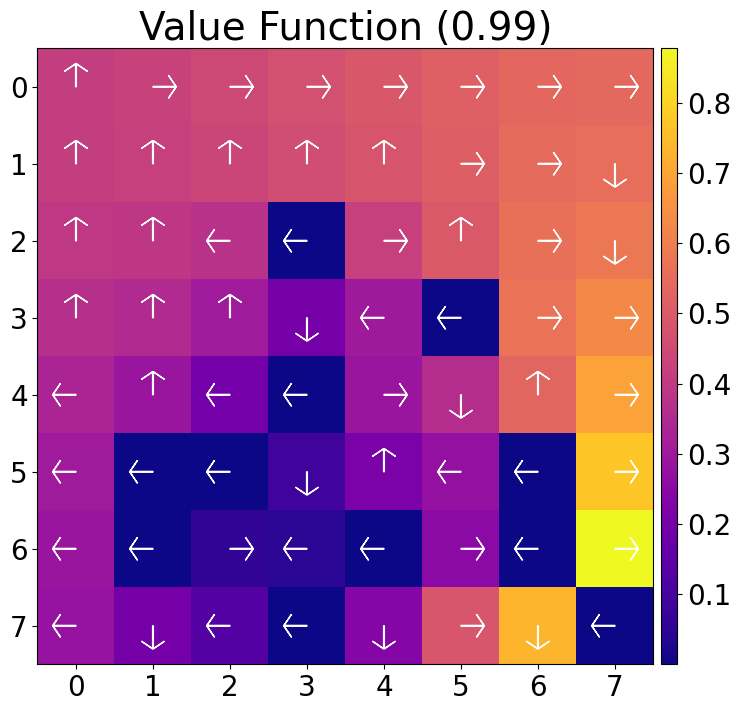

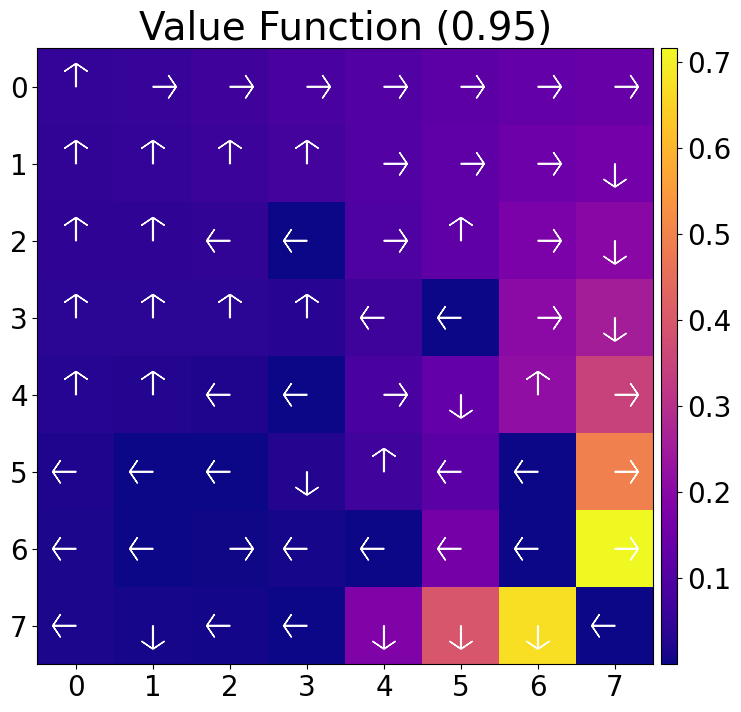

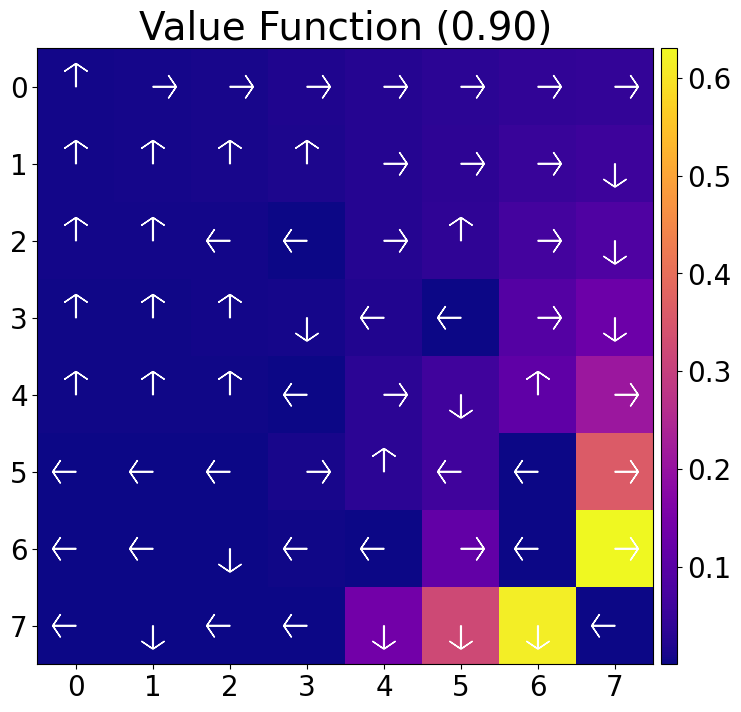

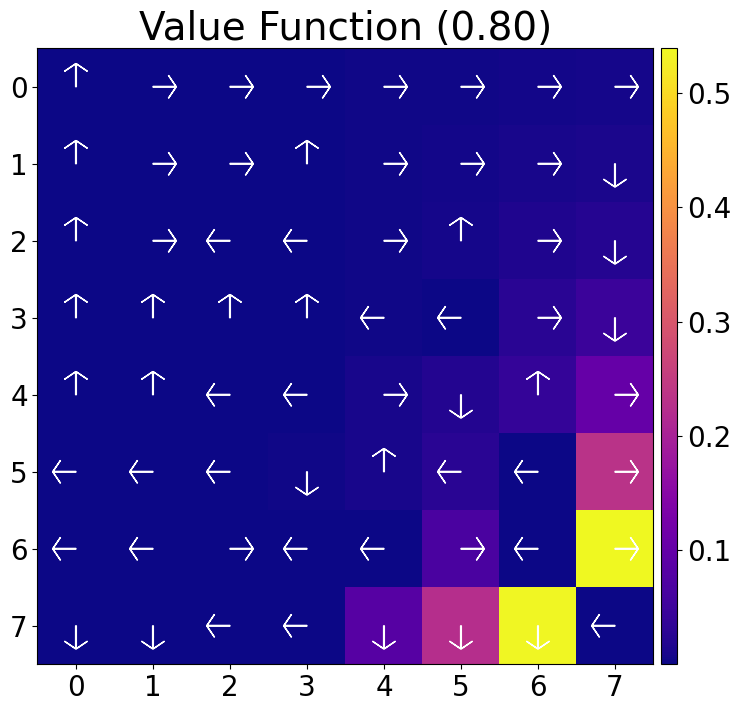

In [7]:
env.reset()
# env.render()

gamma_list = [0.99, 0.95, 0.9, 0.8]
for gamma in gamma_list:
    policy, value, error_list = value_iteration(env,gamma)
    plot_results(policy, value, fig_title="Value Function ({:.02f})".format(gamma))

### Run optimal policy

In [10]:
import cv2
from matplotlib import animation
from IPython.display import display, HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim.to_jshtml())
def display_frames_as_gif(frames):
    patch = plt.imshow(frames[0])
    plt.axis('off')
    def animate(i):
        patch.set_data(frames[i])
    anim = animation.FuncAnimation(
        plt.gcf(),animate,frames=len(frames),interval=100)
    display(display_animation(anim))

policy, value, error_list = value_iteration(env,0.99)

# Loop
obs=env.reset()
frames = []
for t in range(100):
    frame = env.render()[0]
    texted_frame = cv2.putText(
        img=np.copy(frame),text='tick:%d'%(t),org=(100,100),
        fontFace=3,fontScale=2,color=(0,0,255),thickness=3)
    frames.append(texted_frame)
    action = np.random.choice(n_act, 1, p=policy[obs])[0]
    obs, reward, done, info = env.step(action) # step
    if done: break
env.close()
print ("[%d] frames."%(len(frames)))
display_frames_as_gif(frames)

Output hidden; open in https://colab.research.google.com to view.

# Numpy Version

Value iteration algorithm implemented using numpy functions

Value Iteration with Numpy
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 1.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
Computation Time : 0.06



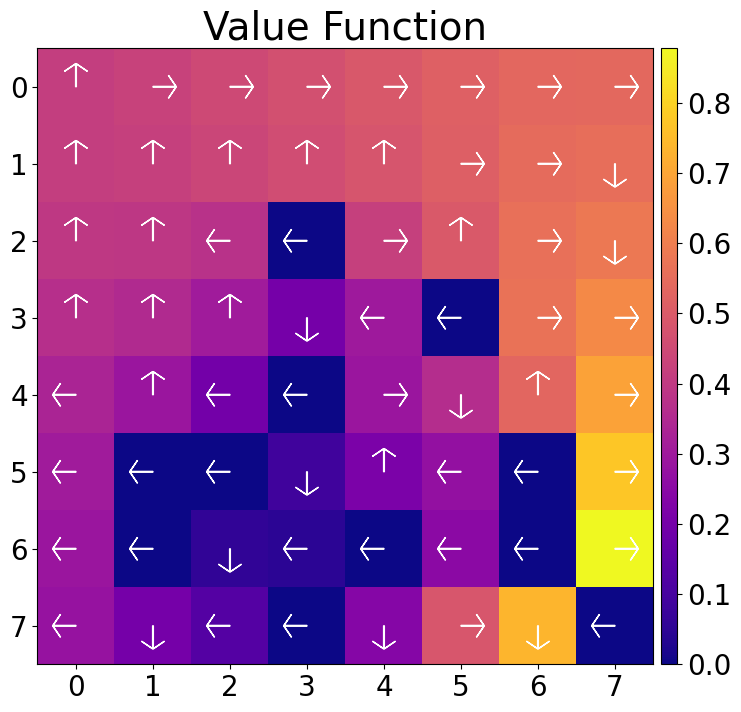

In [21]:
def value_iteration_np(env,gamma=0.99,epsilon=1e-6):
    obs_space = env.observation_space
    n_state = obs_space.n
    act_space = env.action_space
    n_act = act_space.n

    P = np.zeros((n_state,n_act,n_state),np.float64)
    r = np.zeros((n_state,n_act,n_state),np.float64)
    for s in env.unwrapped.P.keys(): # For all states s, update v(s)
        for a in env.unwrapped.P[s].keys(): # For all actions a
            for prob, next_s, reward, done in env.unwrapped.P[s][a]: # For all possible transitions (s,a,s')
                P[s][a][next_s]+=prob
                r[s][a][next_s]=reward
    value = np.zeros((n_state,),np.float64)

    while True:
        # TODO
        # Compute Q update
        q = np.sum(P * (r + gamma * value[np.newaxis,np.newaxis,:]), axis=2)
        v_prime = np.max(q,axis=1)
        dist = np.max(np.abs(value-v_prime))
        value = v_prime
        if dist < epsilon:
            break

    policy = np.zeros((n_state,n_act))
    policy[np.arange(n_state),np.argmax(q,axis=1)] = 1,
    return policy, value

if __name__=='__main__':
    print("Value Iteration with Numpy")
    import time
    start = time.time()
    policy, value = value_iteration_np(env)
    print("Computation Time : %.2f"%(time.time() - start))
    print('')

    plot_results(policy, value)

In [19]:
# Loop
obs=env.reset()
frames = []
for t in range(100):
    frame = env.render()[0]
    texted_frame = cv2.putText(
        img=np.copy(frame),text='tick:%d'%(t),org=(100,100),
        fontFace=3,fontScale=2,color=(0,0,255),thickness=3)
    frames.append(texted_frame)
    action = np.random.choice(n_act, 1, p=policy[obs])[0]
    obs, reward, done, info = env.step(action) # step
    if done: break
env.close()
print ("[%d] frames."%(len(frames)))
display_frames_as_gif(frames)

Output hidden; open in https://colab.research.google.com to view.